<a href="https://colab.research.google.com/github/Prudhvim03/Projects/blob/main/Clustering_and_Classification_for_Dry_Bean_Feature_Imbalanced_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Classification for Dry Bean Feature Imbalanced Data (Hands-on) (Jul-Nov 2024)

## Machine Learning

---



> Name: Prudhvi Raju

> Mail: prudhvim03@gmail.com



---



---






> **Question**


Download the dry bean dataset (multiclass classification) from
https://archive.ics.uci.edu/dataset/602/dry+bean+dataset and perform EDA on the
dataset. Reduce the dimensionality of the dataset using (i) PCA and (ii) TSNE.

Plot the results. Perform clustering analysis using k-means, DBSCAN, agglomera-
tive, GMM on the 2-dimensional dataset. Plot in two subplots (i) PC1 vs PC2 with

labels from clustering algorithms (ii) PC1 vs PC2 with original class labels from the
dataset. Calculate and plot the performance metrics to show the convergence of the
parameters and number of clusters.




> **Breaking down the question into simple steps**


*   Download the dry bean dataset (multiclass classification) from https://archive.ics.uci.edu/dataset/602/dry+bean+dataset
*   Perform EDA on the dataset.

*   Reduce the dimensionality of the dataset using (i) PCA and (ii) TSNE.

*   Plot the results. Perform clustering analysis using k-means, DBSCAN, agglomera- tive, GMM on the 2-dimensional dataset.
*   Plot in two subplots (i) PC1 vs PC2 with labels from clustering algorithms (ii) PC1 vs PC2 with original class labels from the dataset.

*   Calculate and plot the performance metrics to show the convergence of the parameters and number of clusters.


In [6]:
!pwd
!ls

/content
drive  sample_data


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
import numpy as np
df = pd.read_excel("/content/drive/MyDrive/Dry_Bean_Dataset/Dry_Bean_Dataset.xlsx", sheet_name=0)

print(type(df))
print(df.shape)
df.head()

<class 'pandas.core.frame.DataFrame'>
(13611, 17)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [9]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dt

In [10]:
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min     

In [11]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [12]:
print("\nUnique Class Labels:")
print(df['Class'].unique())



Unique Class Labels:
['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


<ipython-input-13-18e2c8c3feed>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Class', palette='viridis')


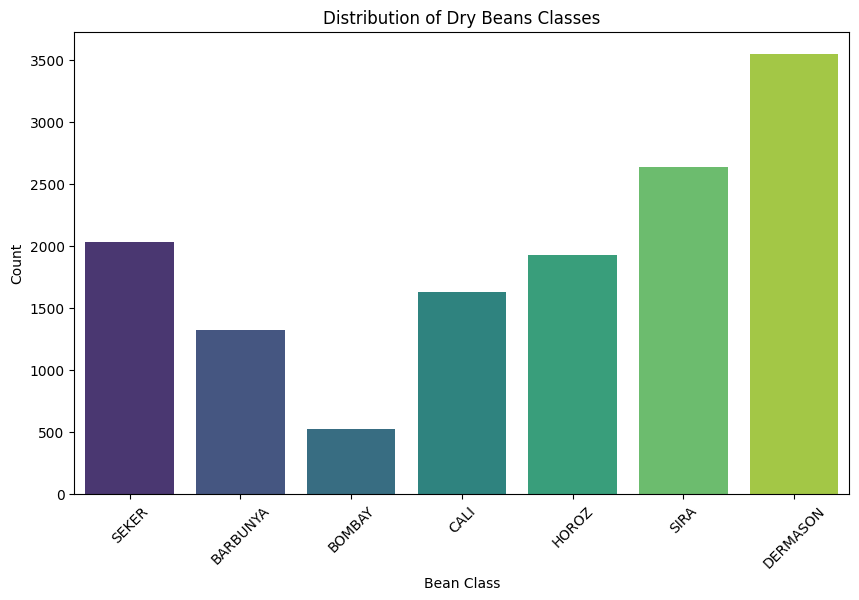

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# Class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Class', palette='viridis')
plt.title('Distribution of Dry Beans Classes')
plt.xlabel('Bean Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

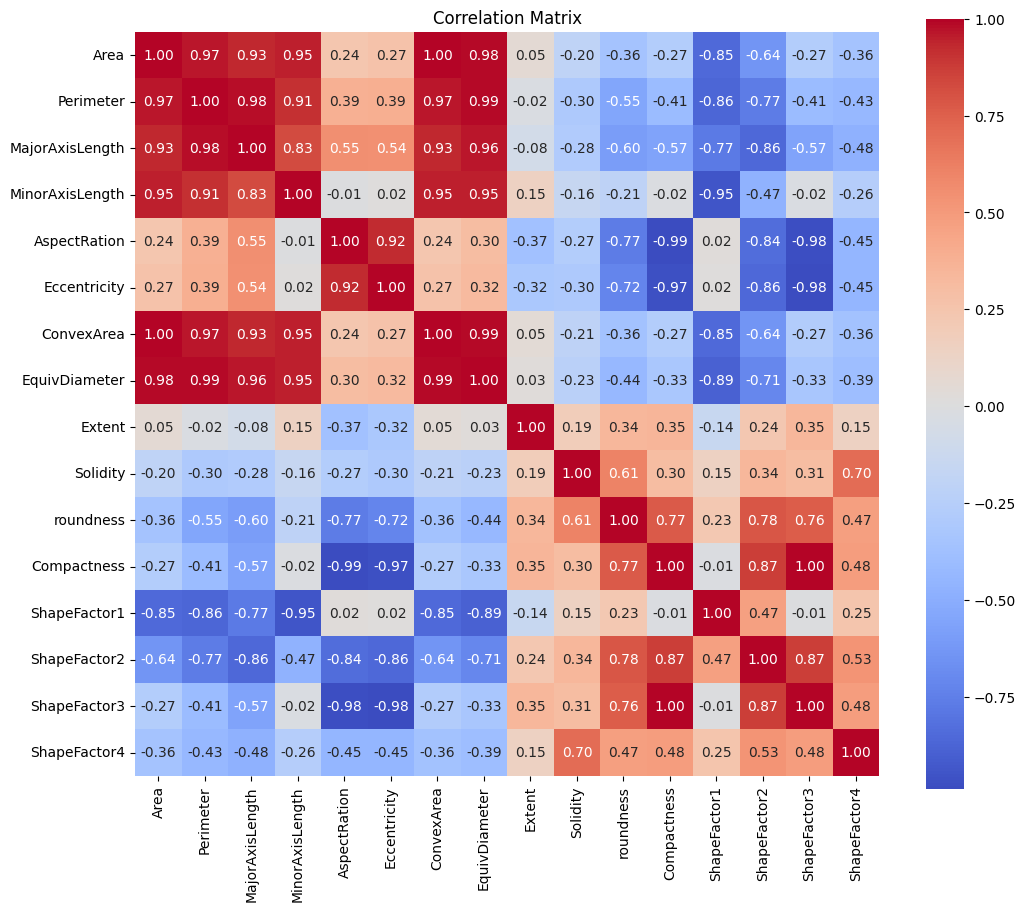

In [14]:
# Correlation matrix
plt.figure(figsize=(12, 10))
# Calculate correlation for numerical features only
correlation_matrix = df.drop(columns=['Class']).corr()  # Exclude 'Class' column
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()



In [15]:
# Import libraries
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [16]:
# Separate features and target variable
X = df.drop(columns=['Class'])
y = df['Class']

In [17]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode the target labels ('Class') using LabelEncoder
label_encoder = LabelEncoder()
df['Class_encoded'] = label_encoder.fit_transform(df['Class'])


In [18]:
df['Class_encoded'].unique()

array([5, 0, 1, 2, 4, 6, 3])

In [19]:
# Separate features and target variable
X = df.drop(columns=['Class', 'Class_encoded'])  # Features (remove 'Class' and 'Class_encoded' from df)
y = df['Class_encoded']  # Target variable (encoded 'Class')

# Standardize the numerical features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


In [20]:
# Check the shape and first few rows of the standardized features
print("\nStandardized Features Shape:", X_standardized.shape)
print("\nFirst 5 rows of the standardized features:")
print(X_standardized[:5])


Standardized Features Shape: (13611, 16)

First 5 rows of the standardized features:
[[-0.84074853 -1.1433189  -1.30659814 -0.63115304 -1.56505251 -2.18572039
  -0.84145059 -1.0633406   0.28908744  0.36761343  1.42386707  1.8391164
   0.68078638  2.40217287  1.92572347  0.83837103]
 [-0.82918764 -1.01392388 -1.39591111 -0.43444458 -1.96978438 -3.68603953
  -0.82610154 -1.04421674  0.69747682 -0.46290658  0.23105404  2.49544929
   0.3679669   3.10089314  2.68970162  0.77113842]
 [-0.80715717 -1.07882906 -1.25235661 -0.58573461 -1.51429132 -2.04533608
  -0.80870371 -1.00808399  0.57819522  0.51841687  1.25286494  1.76484275
   0.60312889  2.23509147  1.84135576  0.91675514]
 [-0.78574055 -0.97721522 -1.27882531 -0.43929028 -1.74161826 -2.74221072
  -0.77397521 -0.97333689  0.67125962 -2.24176709  0.51504917  2.08171549
   0.40171781  2.51507474  2.20424996 -0.19798544]
 [-0.78123896 -1.09738406 -1.38047091 -0.26666336 -2.11799263 -4.53502829
  -0.78428628 -0.96607974  0.47602028  0.8047

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 1.7 MB



Explained Variance by PCA components: [0.55466439 0.26430973]


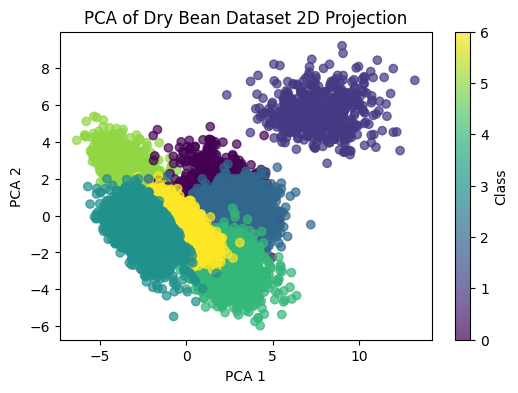

In [22]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)  # Reduce to 2 components
X_pca = pca.fit_transform(X_standardized)

# Output explained variance ratio
print("\nExplained Variance by PCA components:", pca.explained_variance_ratio_)

# Visualize PCA results
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title("PCA of Dry Bean Dataset 2D Projection")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Class')
plt.show()

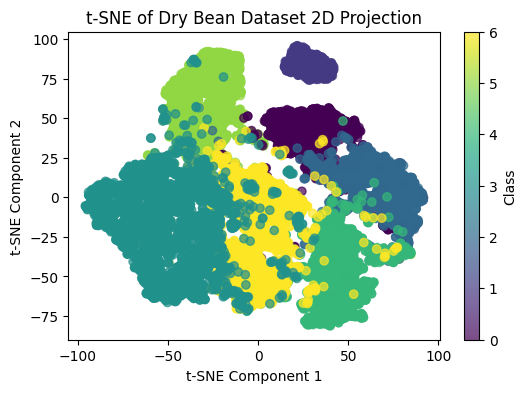

In [23]:
from sklearn.manifold import TSNE

# t-SNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, random_state=2002)
X_tsne = tsne.fit_transform(X_standardized)

# Visualize t-SNE results
plt.figure(figsize=(6, 4))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title("t-SNE of Dry Bean Dataset 2D Projection")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label='Class')
plt.show()

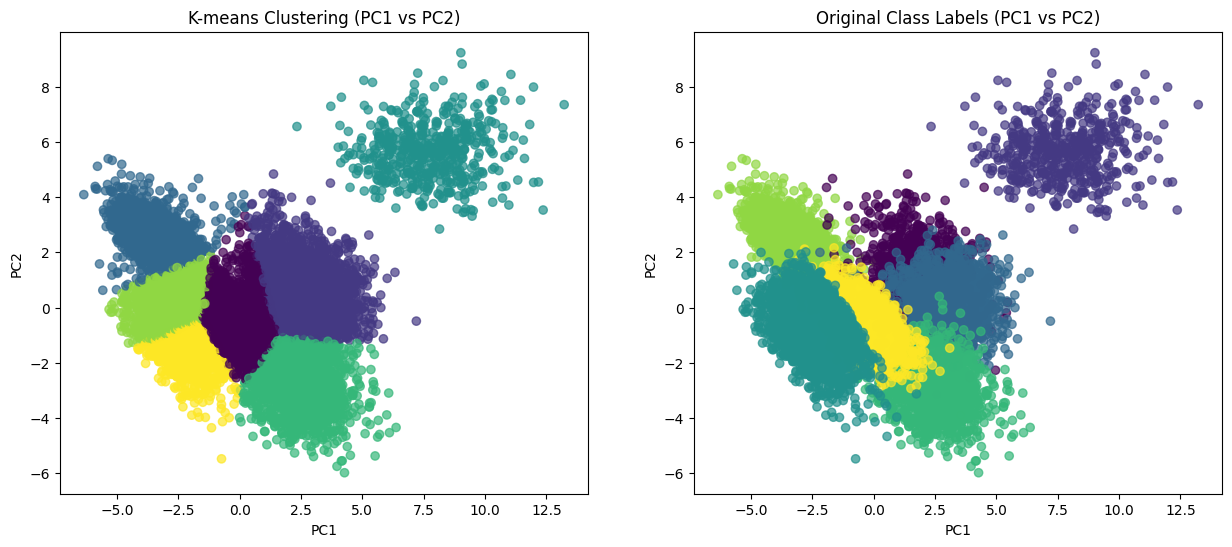

In [24]:

from sklearn.cluster import KMeans

# K-means clustering
kmeans = KMeans(n_clusters=7, random_state=2002) # You might need to adjust n_clusters
kmeans_labels = kmeans.fit_predict(X_pca)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: PC1 vs PC2 with k-means labels
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
axes[0].set_title("K-means Clustering (PC1 vs PC2)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")


# Subplot 2: PC1 vs PC2 with original class labels
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
axes[1].set_title("Original Class Labels (PC1 vs PC2)")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

plt.show()

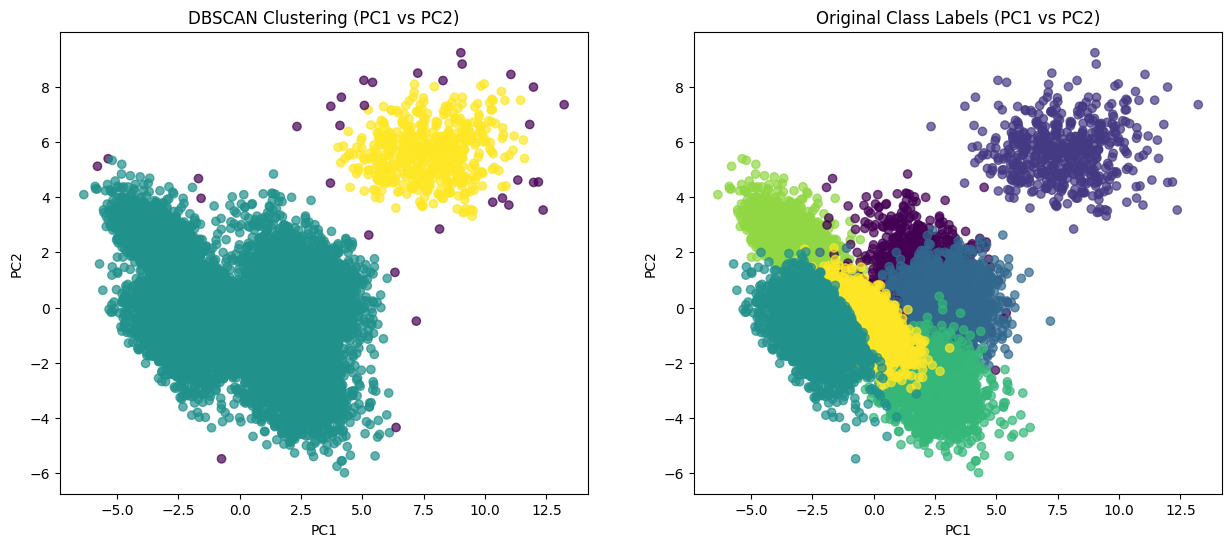

In [25]:

from sklearn.cluster import DBSCAN

# DBSCAN clustering
dbscan = DBSCAN(eps=0.7, min_samples=7) # You might need to tune eps and min_samples
dbscan_labels = dbscan.fit_predict(X_pca)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: PC1 vs PC2 with DBSCAN labels
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)
axes[0].set_title("DBSCAN Clustering (PC1 vs PC2)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

# Subplot 2: PC1 vs PC2 with original class labels (same as before)
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
axes[1].set_title("Original Class Labels (PC1 vs PC2)")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

plt.show()

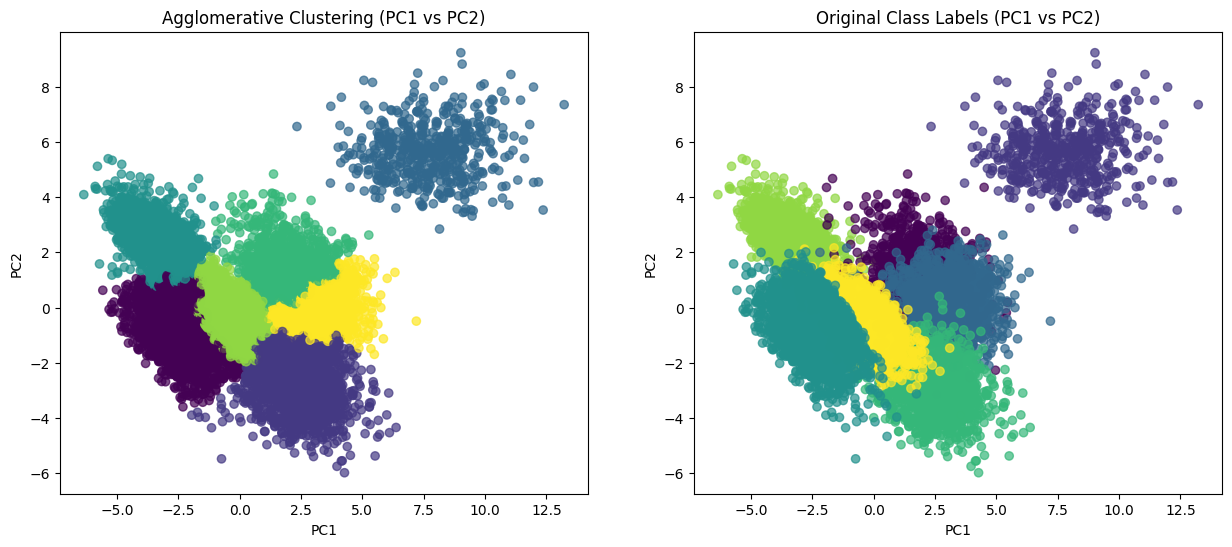

In [26]:

from sklearn.cluster import AgglomerativeClustering

# Agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=7)  # You might need to adjust n_clusters
agg_labels = agg_clustering.fit_predict(X_pca)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: PC1 vs PC2 with Agglomerative labels
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='viridis', alpha=0.7)
axes[0].set_title("Agglomerative Clustering (PC1 vs PC2)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

# Subplot 2: PC1 vs PC2 with original class labels (same as before)
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
axes[1].set_title("Original Class Labels (PC1 vs PC2)")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

plt.show()

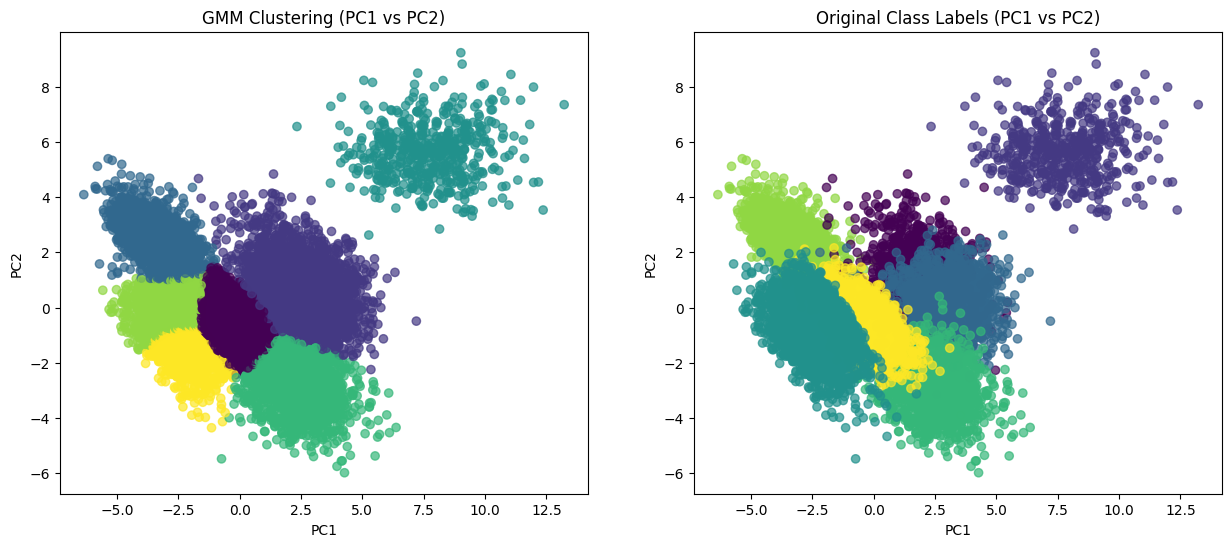

In [27]:

from sklearn.mixture import GaussianMixture

# GMM clustering
gmm = GaussianMixture(n_components=7, random_state=2002)  # You might need to adjust n_components
gmm_labels = gmm.fit_predict(X_pca)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: PC1 vs PC2 with GMM labels
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', alpha=0.7)
axes[0].set_title("GMM Clustering (PC1 vs PC2)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

# Subplot 2: PC1 vs PC2 with original class labels (same as before)
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
axes[1].set_title("Original Class Labels (PC1 vs PC2)")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

plt.show()

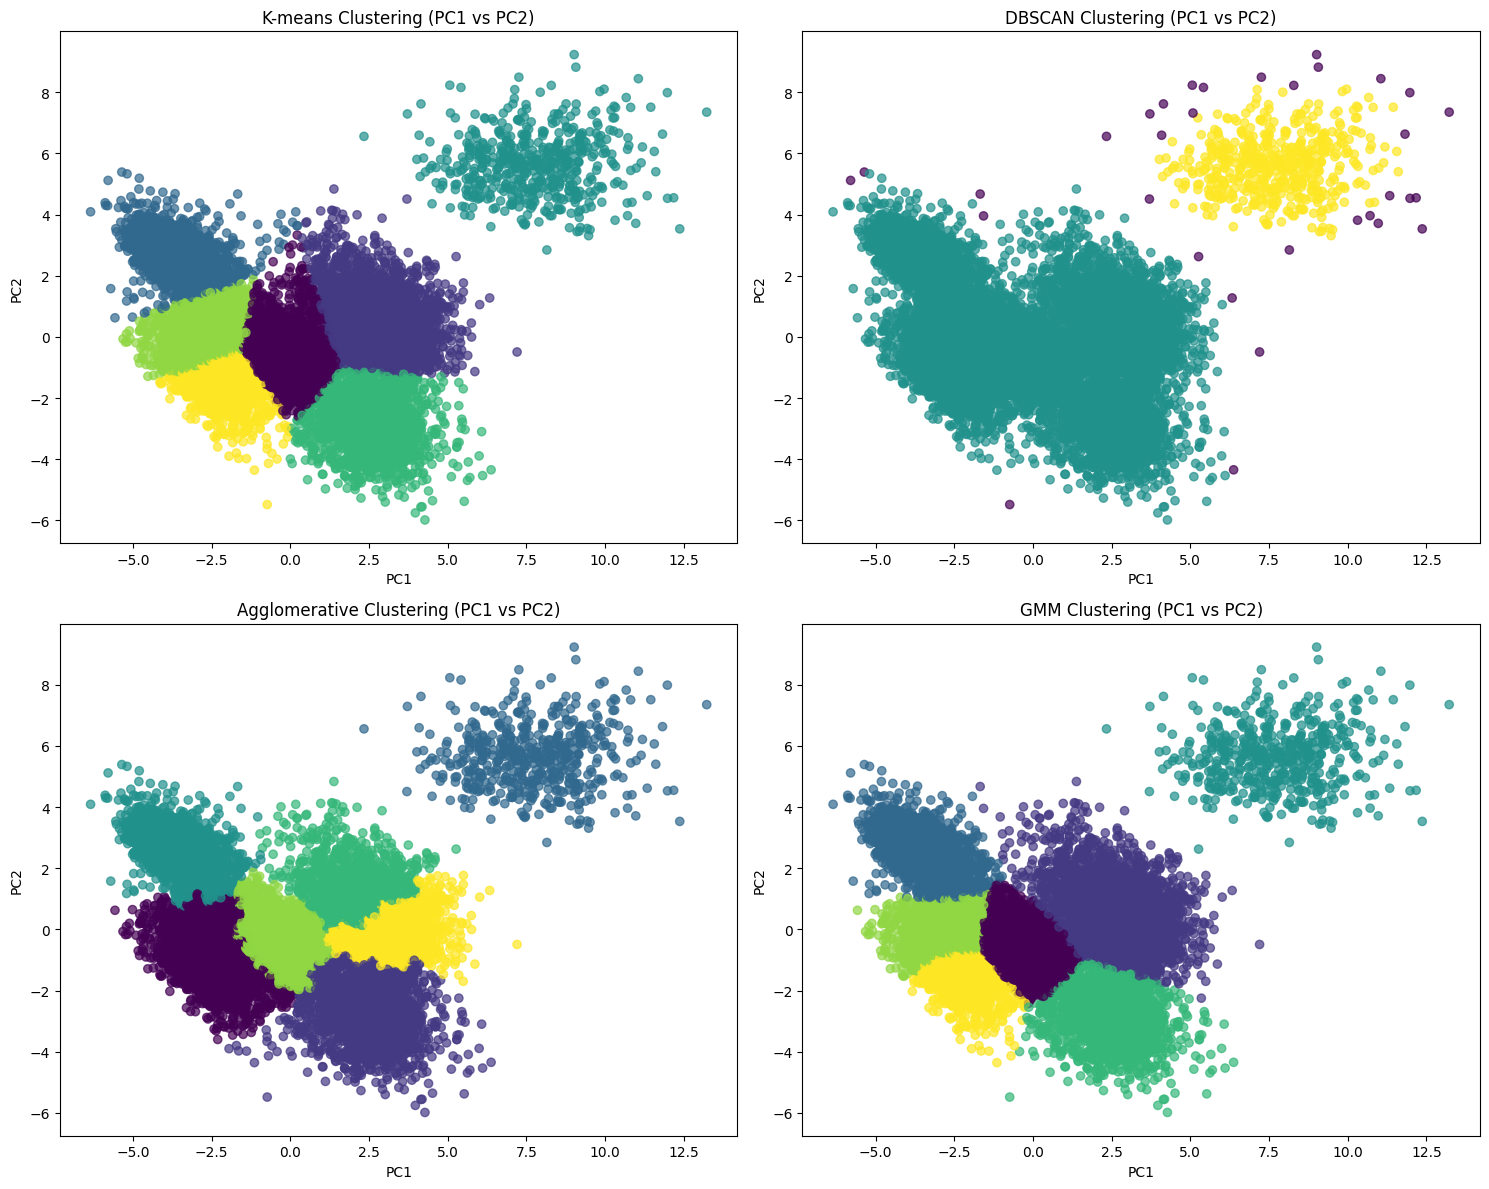

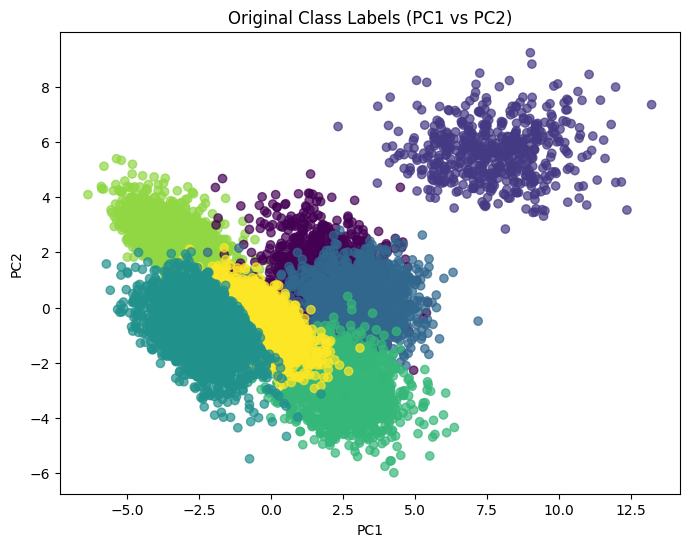

In [28]:


fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Subplot 1: KMeans
axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
axes[0, 0].set_title("K-means Clustering (PC1 vs PC2)")
axes[0, 0].set_xlabel("PC1")
axes[0, 0].set_ylabel("PC2")

# Subplot 2: DBSCAN
axes[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)
axes[0, 1].set_title("DBSCAN Clustering (PC1 vs PC2)")
axes[0, 1].set_xlabel("PC1")
axes[0, 1].set_ylabel("PC2")

# Subplot 3: Agglomerative
axes[1, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='viridis', alpha=0.7)
axes[1, 0].set_title("Agglomerative Clustering (PC1 vs PC2)")
axes[1, 0].set_xlabel("PC1")
axes[1, 0].set_ylabel("PC2")

# Subplot 4: GMM
axes[1, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', alpha=0.7)
axes[1, 1].set_title("GMM Clustering (PC1 vs PC2)")
axes[1, 1].set_xlabel("PC1")
axes[1, 1].set_ylabel("PC2")


plt.tight_layout()
plt.show()


# Original class labels plot (for comparison)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title("Original Class Labels (PC1 vs PC2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

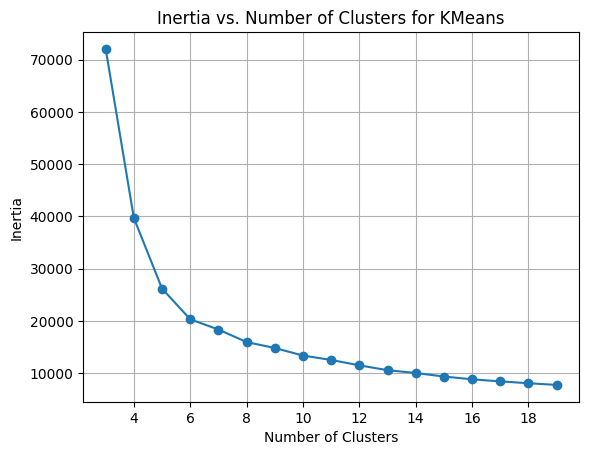

In [29]:
kmeans_inertia = []
for n_clusters in range(3, 20):
  kmeans = KMeans(n_clusters=n_clusters, random_state=2002)
  kmeans.fit(X_pca)
  kmeans_inertia.append(kmeans.inertia_)

plt.plot(range(3, 20), kmeans_inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters for KMeans')
plt.grid(True)
plt.show()

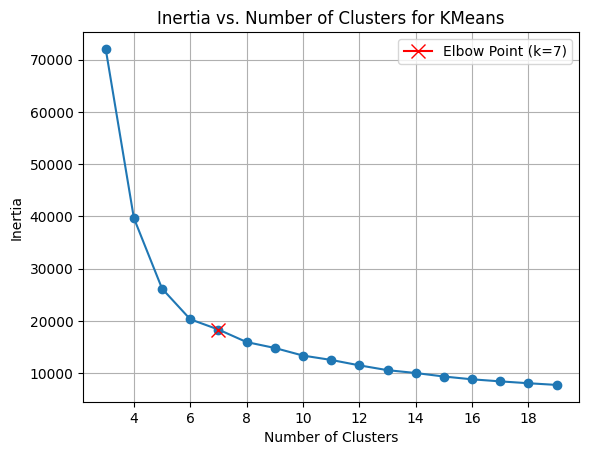

In [30]:
import matplotlib.pyplot as plt

diffs = np.diff(kmeans_inertia)
elbow_index = np.argmin(diffs[4:]) + 4

plt.plot(range(3, 20), kmeans_inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters for KMeans')
plt.grid(True)

# Mark the elbow point
plt.plot(elbow_index + 3, kmeans_inertia[elbow_index], marker='x', markersize=10, color='red', label=f'Elbow Point (k={elbow_index+3})')
plt.legend()

plt.show()

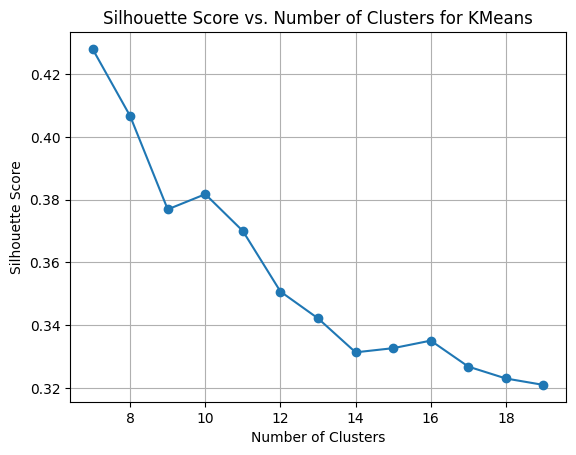

In [32]:
from sklearn.metrics import silhouette_score
kmeans_silhouette = []
for n_clusters in range(7, 20):
  kmeans = KMeans(n_clusters=n_clusters, random_state=2002)
  kmeans.fit(X_pca)
  kmeans_silhouette.append(silhouette_score(X_pca, kmeans.labels_))

plt.plot(range(7, 20), kmeans_silhouette, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters for KMeans')
plt.grid(True)
plt.show()

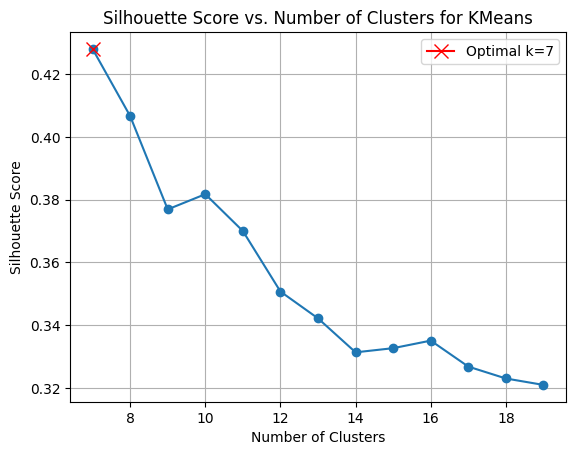

In [33]:
from sklearn.metrics import silhouette_score

kmeans_silhouette = []
for n_clusters in range(7, 20):
  kmeans = KMeans(n_clusters=n_clusters, random_state=2002)
  kmeans.fit(X_pca)
  kmeans_silhouette.append(silhouette_score(X_pca, kmeans.labels_))

plt.plot(range(7, 20), kmeans_silhouette, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters for KMeans')
plt.grid(True)


optimal_k = range(7, 20)[np.argmax(kmeans_silhouette)]
plt.plot(optimal_k, np.max(kmeans_silhouette), marker='x', markersize=10, color='red', label=f'Optimal k={optimal_k}')
plt.legend()

plt.show()